In [49]:
import pandas as pd

# Load the dataset
file_path = 'merged_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its basic information
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     560 non-null    object
 1   Year                        560 non-null    int64 
 2   Spot_Price_72               560 non-null    object
 3   Crude_oil_exports_52        560 non-null    object
 4   Demand                      560 non-null    object
 5   Exports                     360 non-null    object
 6   Gas_Reserve                 560 non-null    object
 7   Imports                     240 non-null    object
 8   Production                  560 non-null    object
 9   Oil_demand_46               560 non-null    object
 10  Oil_exports_dest_51         154 non-null    object
 11  Refinery_capacity_41        480 non-null    object
 12  Refinery_throughput_43      480 non-null    object
 13  World_Production            560 non-null    object

(None,
              Country  Year Spot_Price_72 Crude_oil_exports_52  Demand Exports  \
 0            Algeria  1983          29.9                260.4  18,578  17,910   
 1             Angola  1983            na                359.9     300       0   
 2              Congo  1983            na                 93.3       0       0   
 3  Equatorial Guinea  1983            na                    0       0       0   
 4              Gabon  1983            na                135.5     150     NaN   
 
   Gas_Reserve Imports Production Oil_demand_46  ... AccountBalance-table2.7  \
 0       3,531     NaN     36,267           150  ...                  48,902   
 1          53     NaN        300            37  ...                   5,788   
 2          70     NaN          0             2  ...                   2,097   
 3           0     NaN          0             0  ...                      40   
 4          12     NaN        150            12  ...                   3,689   
 
   WellsCompleted

In [50]:
data

,Country,Year,Spot_Price_72,Crude_oil_exports_52,Demand,Exports,Gas_Reserve,Imports,Production,Oil_demand_46,...,AccountBalance-table2.7,WellsCompleted-table3.3,Population-table2.1,petroleumExport-table2.5,GDP-table2.2,GDPGrowthRate-table2.3,ExportValue-table2.4,crudeOilReserve-table3.1,CrudeOilProdution-table3.5,bioFuelProdution-table3.7
0,Algeria,1983,29.9,260.4,"18,578","17,910","3,531",NaN,"36,267",150,...,"48,902","48,902","48,902","48,902","48,902","48,902","48,902","48,902","48,902","48,902"
1,Angola,1983,na,359.9,300,0,53,NaN,300,37,...,"5,788","5,788","5,788","5,788","5,788","5,788","5,788","5,788","5,788","5,788"
2,Congo,1983,na,93.3,0,0,70,NaN,0,2,...,"2,097","2,097","2,097","2,097","2,097","2,097","2,097","2,097","2,097","2,097"
3,Equatorial Guinea,1983,na,0,0,0,0,NaN,0,0,...,40,40,40,40,40,40,40,40,40,40
4,Gabon,1983,na,135.5,150,NaN,12,NaN,150,12,...,"3,689","3,689","3,689","3,689","3,689","3,689","3,689","3,689","3,689","3,689"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Nigeria,2022,103.63,"1,388.30","12,117","32,190","5,913",NaN,"44,307",518,...,"470,332","470,332","470,332","470,332","470,332","470,332","470,332","470,332","470,332","470,332"
556,Saudi Arabia,2022,101.64,"7,363.60","122,400",NaN,"9,514",NaN,"122,895","3,172",...,"1,108,149","1,108,149","1,108,149","1,108,149","1,108,149","1,108,149","1,108,149","1,108,149","1,108,149","1,108,149"
557,United Arab Emirates,2022,98.89,"2,717.10","70,236","7,280","8,210","21,770","55,574",958,...,"507,535","507,535","507,535","507,535","507,535","507,535","507,535","507,535","507,535","507,535"
558,Venezuela,2022,76.96,438.2,"9,292",NaN,"5,511",0,"24,421",272,...,"93,111","93,111","93,111","93,111","93,111","93,111","93,111","93,111","93,111","93,111"


In [51]:
# Data Cleaning
# Converting columns with numerical information from object type to appropriate numeric types

def clean_numeric(column):
    """
    Convert a dataframe column to numeric, handling non-numeric characters and missing values.
    """
    # Replace 'na' with NaN and convert the column to numeric
    return pd.to_numeric(column.str.replace(',', '').replace('na', pd.NA), errors='coerce')

# Applying the cleaning function to all columns except 'Country' and 'Year'
numeric_columns = data.columns.drop(['Country', 'Year'])
data[numeric_columns] = data[numeric_columns].apply(clean_numeric)

# Checking the first few rows of the cleaned dataframe and its info again
cleaned_data_head = data.head()
cleaned_data_info = data.info()

cleaned_data_info, cleaned_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     560 non-null    object 
 1   Year                        560 non-null    int64  
 2   Spot_Price_72               425 non-null    float64
 3   Crude_oil_exports_52        560 non-null    float64
 4   Demand                      560 non-null    int64  
 5   Exports                     360 non-null    float64
 6   Gas_Reserve                 560 non-null    int64  
 7   Imports                     240 non-null    float64
 8   Production                  560 non-null    int64  
 9   Oil_demand_46               560 non-null    int64  
 10  Oil_exports_dest_51         154 non-null    float64
 11  Refinery_capacity_41        480 non-null    float64
 12  Refinery_throughput_43      480 non-null    float64
 13  World_Production            560 non

(None,
              Country  Year  Spot_Price_72  Crude_oil_exports_52  Demand  \
 0            Algeria  1983           29.9                 260.4   18578   
 1             Angola  1983            NaN                 359.9     300   
 2              Congo  1983            NaN                  93.3       0   
 3  Equatorial Guinea  1983            NaN                   0.0       0   
 4              Gabon  1983            NaN                 135.5     150   
 
    Exports  Gas_Reserve  Imports  Production  Oil_demand_46  ...  \
 0  17910.0         3531      NaN       36267            150  ...   
 1      0.0           53      NaN         300             37  ...   
 2      0.0           70      NaN           0              2  ...   
 3      0.0            0      NaN           0              0  ...   
 4      NaN           12      NaN         150             12  ...   
 
    AccountBalance-table2.7  WellsCompleted-table3.3  Population-table2.1  \
 0                    48902               

In [52]:
# Statistical Summary
statistical_summary = data.describe()

statistical_summary


,Year,Spot_Price_72,Crude_oil_exports_52,Demand,Exports,Gas_Reserve,Imports,Production,Oil_demand_46,Oil_exports_dest_51,...,AccountBalance-table2.7,WellsCompleted-table3.3,Population-table2.1,petroleumExport-table2.5,GDP-table2.2,GDPGrowthRate-table2.3,ExportValue-table2.4,crudeOilReserve-table3.1,CrudeOilProdution-table3.5,bioFuelProdution-table3.7
count,560.000000,425.000000,560.000000,560.000000,360.000000,560.000000,240.000000,560.000000,560.000000,154.000000,...,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02
mean,2002.500000,49.272941,2779.916250,41411.096429,17605.836111,8174.408929,6273.262500,52067.242857,845.560714,3254.677273,...,2.138242e+05,2.138242e+05,2.138242e+05,2.138242e+05,2.138242e+05,2.138242e+05,2.138242e+05,2.138242e+05,2.138242e+05,2.138242e+05
std,11.553717,31.067710,5007.024954,88792.460955,28803.793978,15579.281820,10492.237206,108485.249196,1623.823713,5734.648520,...,4.835736e+05,4.835736e+05,4.835736e+05,4.835736e+05,4.835736e+05,4.835736e+05,4.835736e+05,4.835736e+05,4.835736e+05,4.835736e+05
min,1983.000000,10.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,...,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
25%,1992.750000,20.300000,344.125000,891.750000,0.000000,275.000000,0.000000,1300.000000,58.500000,438.250000,...,1.745175e+04,1.745175e+04,1.745175e+04,1.745175e+04,1.745175e+04,1.745175e+04,1.745175e+04,1.745175e+04,1.745175e+04,1.745175e+04
50%,2002.500000,41.980000,1248.200000,9651.000000,4961.000000,3166.500000,1358.000000,13708.000000,272.500000,1602.150000,...,6.027100e+04,6.027100e+04,6.027100e+04,6.027100e+04,6.027100e+04,6.027100e+04,6.027100e+04,6.027100e+04,6.027100e+04,6.027100e+04
75%,2012.250000,69.890000,2167.275000,30420.750000,21202.500000,5766.750000,6240.500000,47971.000000,681.500000,2412.450000,...,1.761960e+05,1.761960e+05,1.761960e+05,1.761960e+05,1.761960e+05,1.761960e+05,1.761960e+05,1.761960e+05,1.761960e+05,1.761960e+05
max,2022.000000,114.150000,25098.900000,574623.000000,132341.000000,75121.000000,42419.000000,672718.000000,8886.000000,25098.900000,...,3.374636e+06,3.374636e+06,3.374636e+06,3.374636e+06,3.374636e+06,3.374636e+06,3.374636e+06,3.374636e+06,3.374636e+06,3.374636e+06


In [53]:
data

,Country,Year,Spot_Price_72,Crude_oil_exports_52,Demand,Exports,Gas_Reserve,Imports,Production,Oil_demand_46,...,AccountBalance-table2.7,WellsCompleted-table3.3,Population-table2.1,petroleumExport-table2.5,GDP-table2.2,GDPGrowthRate-table2.3,ExportValue-table2.4,crudeOilReserve-table3.1,CrudeOilProdution-table3.5,bioFuelProdution-table3.7
0,Algeria,1983,29.90,260.4,18578,17910.0,3531,NaN,36267,150,...,48902,48902,48902,48902,48902,48902,48902,48902,48902,48902
1,Angola,1983,NaN,359.9,300,0.0,53,NaN,300,37,...,5788,5788,5788,5788,5788,5788,5788,5788,5788,5788
2,Congo,1983,NaN,93.3,0,0.0,70,NaN,0,2,...,2097,2097,2097,2097,2097,2097,2097,2097,2097,2097
3,Equatorial Guinea,1983,NaN,0.0,0,0.0,0,NaN,0,0,...,40,40,40,40,40,40,40,40,40,40
4,Gabon,1983,NaN,135.5,150,NaN,12,NaN,150,12,...,3689,3689,3689,3689,3689,3689,3689,3689,3689,3689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Nigeria,2022,103.63,1388.3,12117,32190.0,5913,NaN,44307,518,...,470332,470332,470332,470332,470332,470332,470332,470332,470332,470332
556,Saudi Arabia,2022,101.64,7363.6,122400,NaN,9514,NaN,122895,3172,...,1108149,1108149,1108149,1108149,1108149,1108149,1108149,1108149,1108149,1108149
557,United Arab Emirates,2022,98.89,2717.1,70236,7280.0,8210,21770.0,55574,958,...,507535,507535,507535,507535,507535,507535,507535,507535,507535,507535
558,Venezuela,2022,76.96,438.2,9292,NaN,5511,0.0,24421,272,...,93111,93111,93111,93111,93111,93111,93111,93111,93111,93111


/var/folders/nl/b2hqpwb52vz_kw1r2vyqpxb80000gn/T/ipykernel_57512/470079102.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Spot_Price_72', data=data, estimator='mean', ci=None)


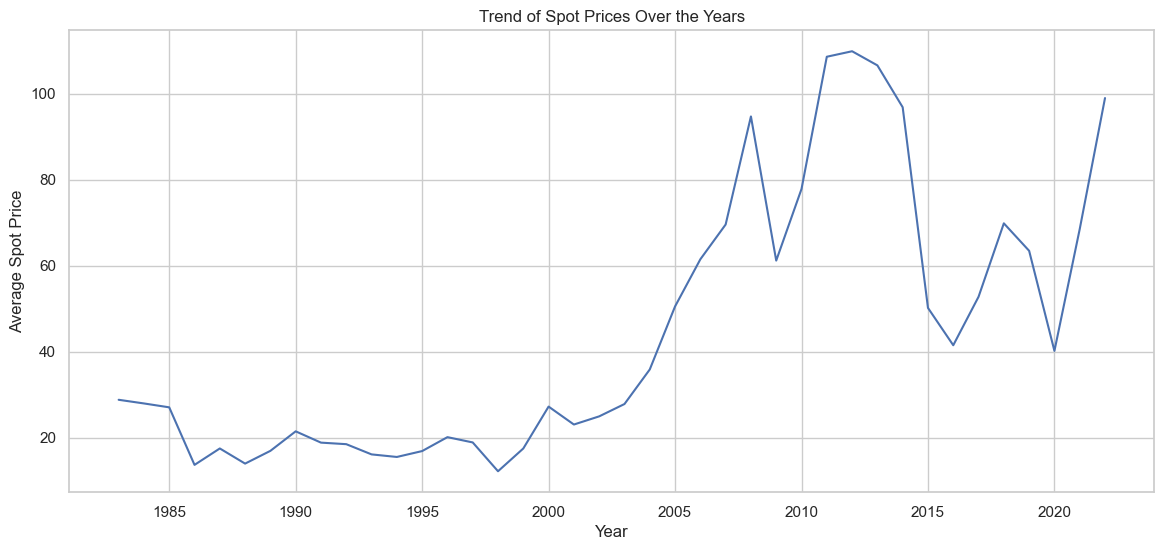

/var/folders/nl/b2hqpwb52vz_kw1r2vyqpxb80000gn/T/ipykernel_57512/470079102.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Production', data=data, estimator='mean', ci=None, label='Production')
/var/folders/nl/b2hqpwb52vz_kw1r2vyqpxb80000gn/T/ipykernel_57512/470079102.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Demand', data=data, estimator='mean', ci=None, label='Demand')


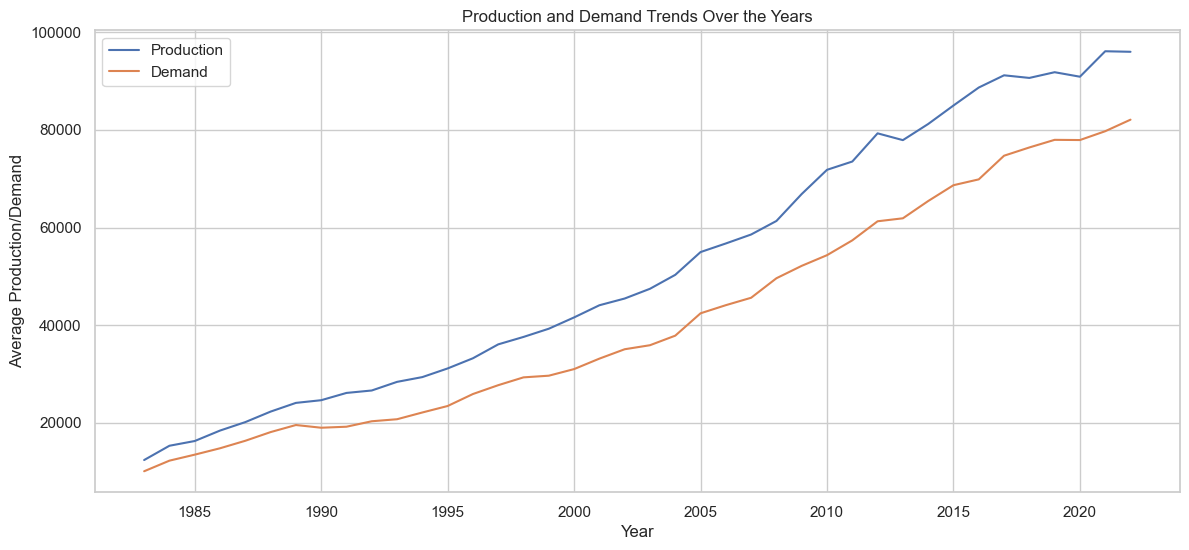

/var/folders/nl/b2hqpwb52vz_kw1r2vyqpxb80000gn/T/ipykernel_57512/470079102.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Exports', data=data, estimator='mean', ci=None, label='Exports')
/var/folders/nl/b2hqpwb52vz_kw1r2vyqpxb80000gn/T/ipykernel_57512/470079102.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Imports', data=data, estimator='mean', ci=None, label='Imports')


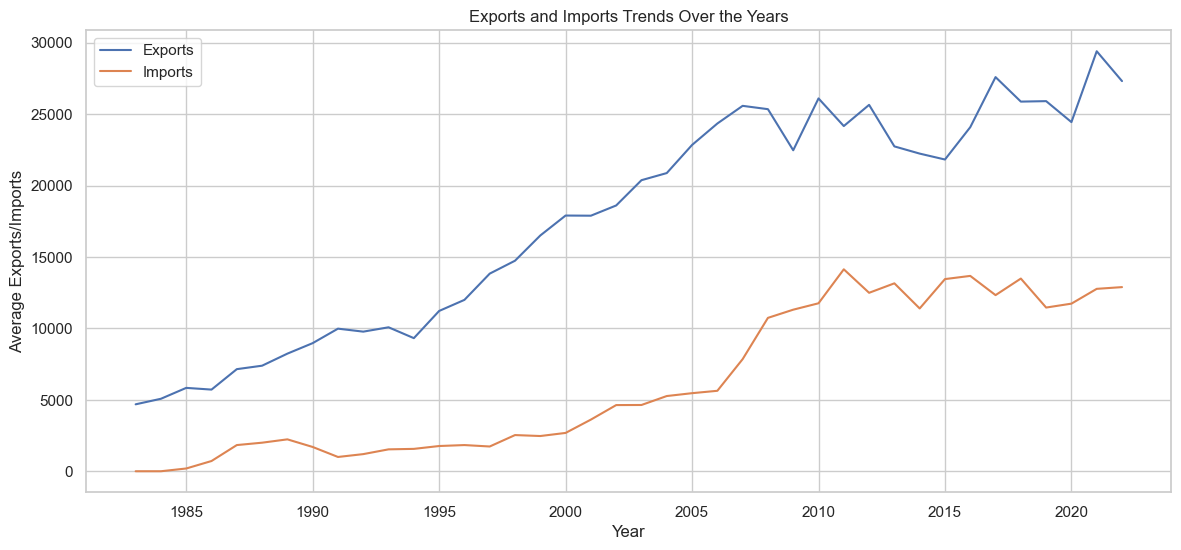

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting Spot Price Trend Analysis
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Spot_Price_72', data=data, estimator='mean', ci=None)
plt.title('Trend of Spot Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Spot Price')
plt.show()

# Plotting Production and Demand Trends
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Production', data=data, estimator='mean', ci=None, label='Production')
sns.lineplot(x='Year', y='Demand', data=data, estimator='mean', ci=None, label='Demand')
plt.title('Production and Demand Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Production/Demand')
plt.legend()
plt.show()

# Plotting Exports and Imports Trends
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Exports', data=data, estimator='mean', ci=None, label='Exports')
sns.lineplot(x='Year', y='Imports', data=data, estimator='mean', ci=None, label='Imports')
plt.title('Exports and Imports Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Exports/Imports')
plt.legend()
plt.show()


In [55]:
country_data

,Country,Year,Spot_Price_72,Crude_oil_exports_52,Demand,Exports,Gas_Reserve,Imports,Production,Oil_demand_46,...,AccountBalance-table2.7,WellsCompleted-table3.3,Population-table2.1,petroleumExport-table2.5,GDP-table2.2,GDPGrowthRate-table2.3,ExportValue-table2.4,crudeOilReserve-table3.1,CrudeOilProdution-table3.5,bioFuelProdution-table3.7
4,Gabon,1983,0.00,135.5,150,0.0,12,0.0,150,12,...,3689,3689,3689,3689,3689,3689,3689,3689,3689,3689
18,Gabon,1984,0.00,139.5,150,0.0,16,0.0,70,11,...,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
32,Gabon,1985,0.00,163.8,57,0.0,19,0.0,70,13,...,3736,3736,3736,3736,3736,3736,3736,3736,3736,3736
46,Gabon,1986,0.00,150.1,28,0.0,17,0.0,60,14,...,4889,4889,4889,4889,4889,4889,4889,4889,4889,4889
60,Gabon,1987,0.00,145.1,116,0.0,18,0.0,110,12,...,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699
74,Gabon,1988,0.00,148.1,100,0.0,16,0.0,100,12,...,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079
88,Gabon,1989,0.00,192.5,90,0.0,14,0.0,90,13,...,4458,4458,4458,4458,4458,4458,4458,4458,4458,4458
102,Gabon,1990,0.00,255.0,85,0.0,12,0.0,100,11,...,6339,6339,6339,6339,6339,6339,6339,6339,6339,6339
116,Gabon,1991,0.00,278.5,100,0.0,11,0.0,100,12,...,5754,5754,5754,5754,5754,5754,5754,5754,5754,5754
130,Gabon,1992,0.00,271.3,100,0.0,16,0.0,100,12,...,5955,5955,5955,5955,5955,5955,5955,5955,5955,5955


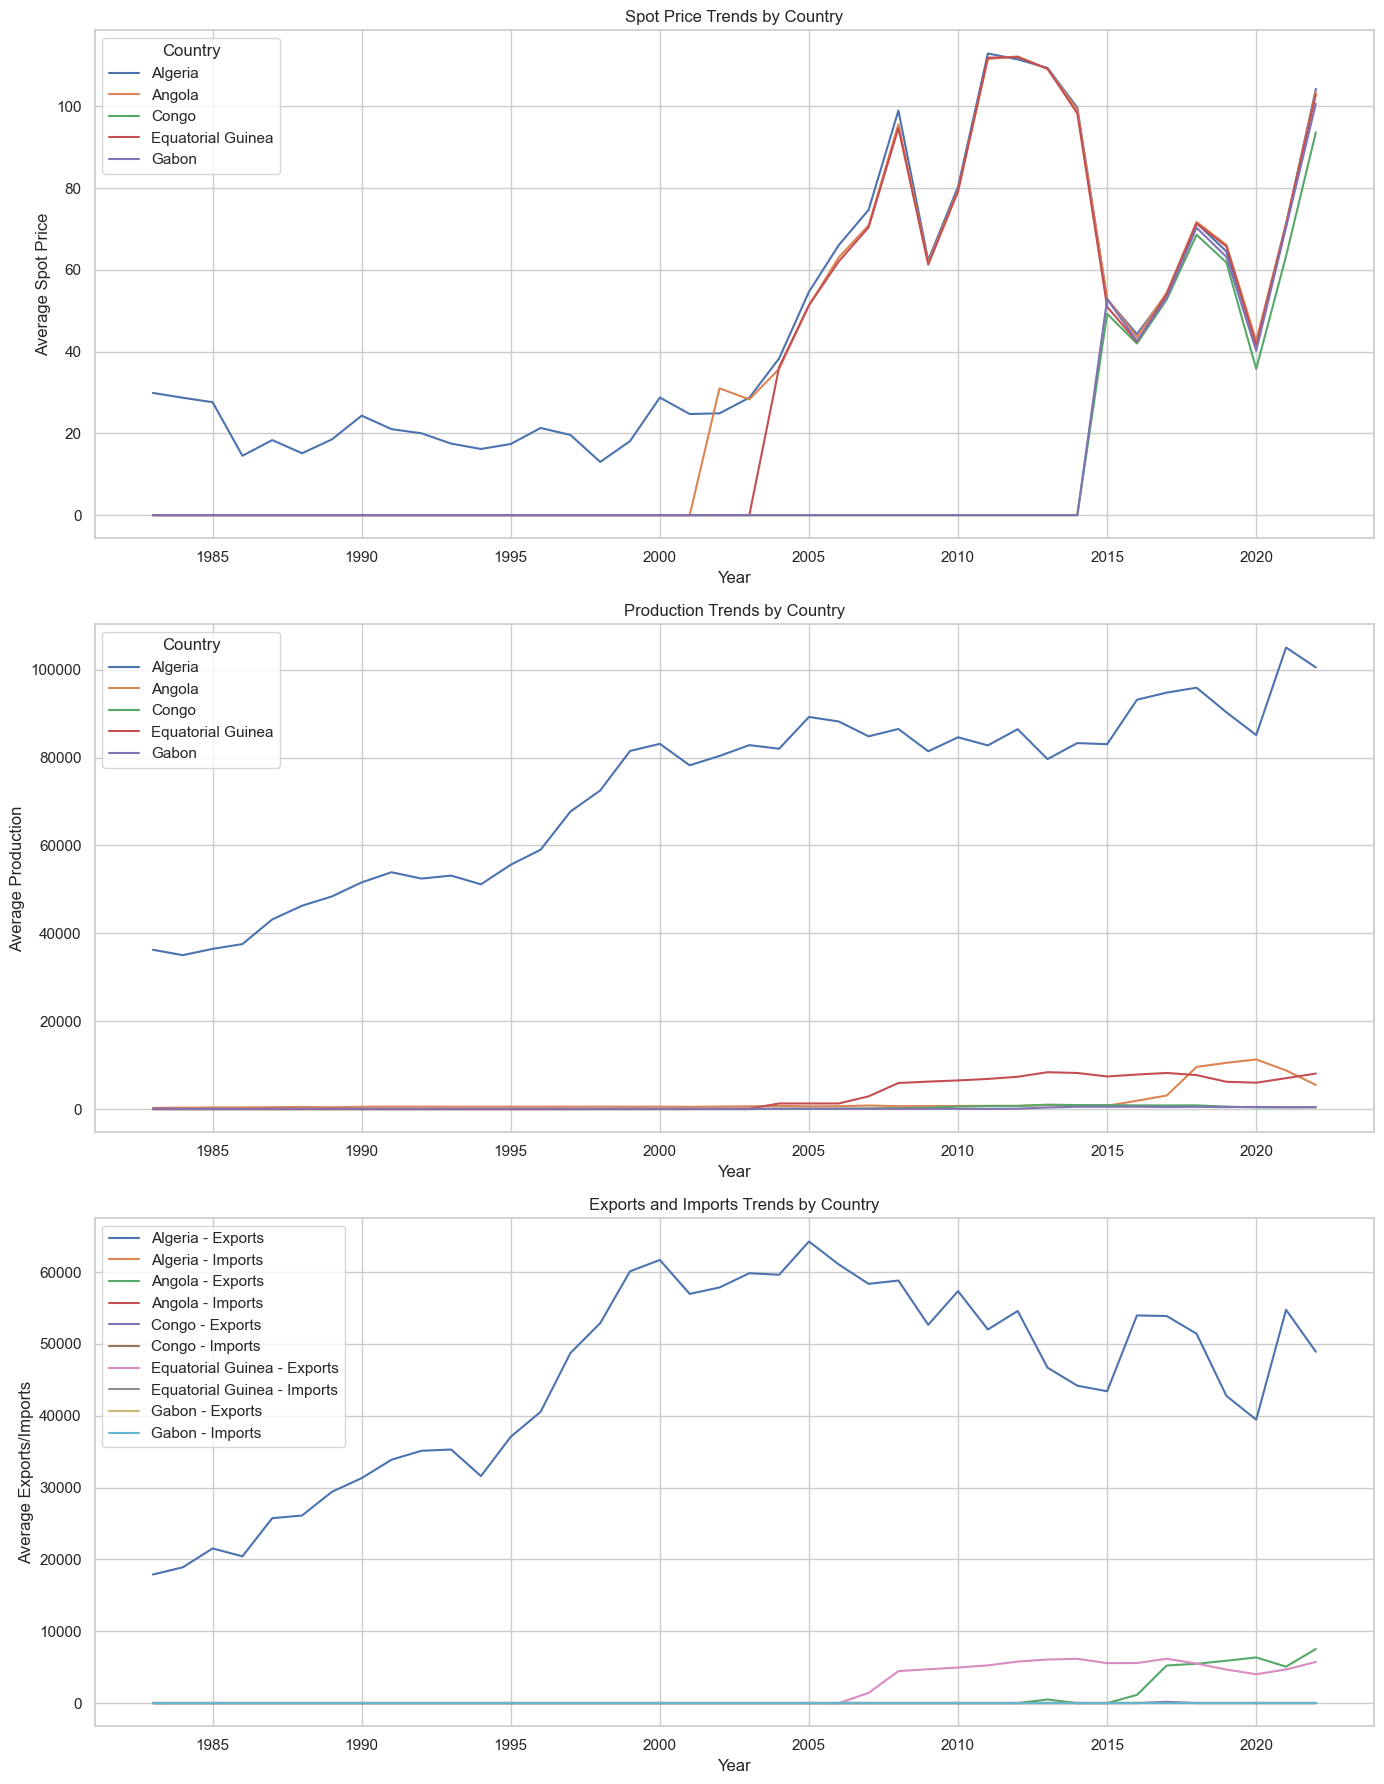

In [56]:
# # Selecting a few countries for the analysis
# selected_countries = data['Country'].unique()[:5]  # Picking the first 5 unique countries as an example

# # Plotting country-specific trends
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# # Spot Price Trends by Country
# sns.lineplot(ax=axes[0], x='Year', y='Spot_Price_72', hue='Country', data=data[data['Country'].isin(selected_countries)])
# axes[0].set_title('Spot Price Trends by Country')
# axes[0].set_ylabel('Average Spot Price')

# # Production Trends by Country
# sns.lineplot(ax=axes[1], x='Year', y='Production', hue='Country', data=data[data['Country'].isin(selected_countries)])
# axes[1].set_title('Production Trends by Country')
# axes[1].set_ylabel('Average Production')

# # Exports and Imports Trends by Country
# for country in selected_countries:
#     country_data = data[data['Country'] == country]
#     sns.lineplot(ax=axes[2], x='Year', y='Exports', data=country_data, label=f'{country} - Exports')
#     sns.lineplot(ax=axes[2], x='Year', y='Imports', data=country_data, label=f'{country} - Imports')
# axes[2].set_title('Exports and Imports Trends by Country')
# axes[2].set_ylabel('Average Exports/Imports')

# plt.tight_layout()
# plt.show()

# Fill NaN values in 'Imports' column with 0 before plotting
data_filled = data.copy()
data_filled['Spot_Price_72'] = data_filled['Spot_Price_72'].fillna(0)
data_filled['Production'] = data_filled['Production'].fillna(0)
data_filled['Imports'] = data_filled['Imports'].fillna(0)
data_filled['Exports'] = data_filled['Exports'].fillna(0)

# Re-running the plotting code with the modified data
selected_countries = data_filled['Country'].unique()[:5]  # First 5 unique countries

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Spot Price Trends by Country
sns.lineplot(ax=axes[0], x='Year', y='Spot_Price_72', hue='Country', data=data_filled[data_filled['Country'].isin(selected_countries)])
axes[0].set_title('Spot Price Trends by Country')
axes[0].set_ylabel('Average Spot Price')

# Production Trends by Country
sns.lineplot(ax=axes[1], x='Year', y='Production', hue='Country', data=data_filled[data_filled['Country'].isin(selected_countries)])
axes[1].set_title('Production Trends by Country')
axes[1].set_ylabel('Average Production')

# Exports and Imports Trends by Country
for country in selected_countries:
    country_data = data_filled[data_filled['Country'] == country]
    sns.lineplot(ax=axes[2], x='Year', y='Exports', data=country_data, label=f'{country} - Exports')
    sns.lineplot(ax=axes[2], x='Year', y='Imports', data=country_data, label=f'{country} - Imports')
axes[2].set_title('Exports and Imports Trends by Country')
axes[2].set_ylabel('Average Exports/Imports')

plt.tight_layout()
plt.show()


In [57]:
country_data

,Country,Year,Spot_Price_72,Crude_oil_exports_52,Demand,Exports,Gas_Reserve,Imports,Production,Oil_demand_46,...,AccountBalance-table2.7,WellsCompleted-table3.3,Population-table2.1,petroleumExport-table2.5,GDP-table2.2,GDPGrowthRate-table2.3,ExportValue-table2.4,crudeOilReserve-table3.1,CrudeOilProdution-table3.5,bioFuelProdution-table3.7
4,Gabon,1983,0.00,135.5,150,0.0,12,0.0,150,12,...,3689,3689,3689,3689,3689,3689,3689,3689,3689,3689
18,Gabon,1984,0.00,139.5,150,0.0,16,0.0,70,11,...,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
32,Gabon,1985,0.00,163.8,57,0.0,19,0.0,70,13,...,3736,3736,3736,3736,3736,3736,3736,3736,3736,3736
46,Gabon,1986,0.00,150.1,28,0.0,17,0.0,60,14,...,4889,4889,4889,4889,4889,4889,4889,4889,4889,4889
60,Gabon,1987,0.00,145.1,116,0.0,18,0.0,110,12,...,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699
74,Gabon,1988,0.00,148.1,100,0.0,16,0.0,100,12,...,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079
88,Gabon,1989,0.00,192.5,90,0.0,14,0.0,90,13,...,4458,4458,4458,4458,4458,4458,4458,4458,4458,4458
102,Gabon,1990,0.00,255.0,85,0.0,12,0.0,100,11,...,6339,6339,6339,6339,6339,6339,6339,6339,6339,6339
116,Gabon,1991,0.00,278.5,100,0.0,11,0.0,100,12,...,5754,5754,5754,5754,5754,5754,5754,5754,5754,5754
130,Gabon,1992,0.00,271.3,100,0.0,16,0.0,100,12,...,5955,5955,5955,5955,5955,5955,5955,5955,5955,5955


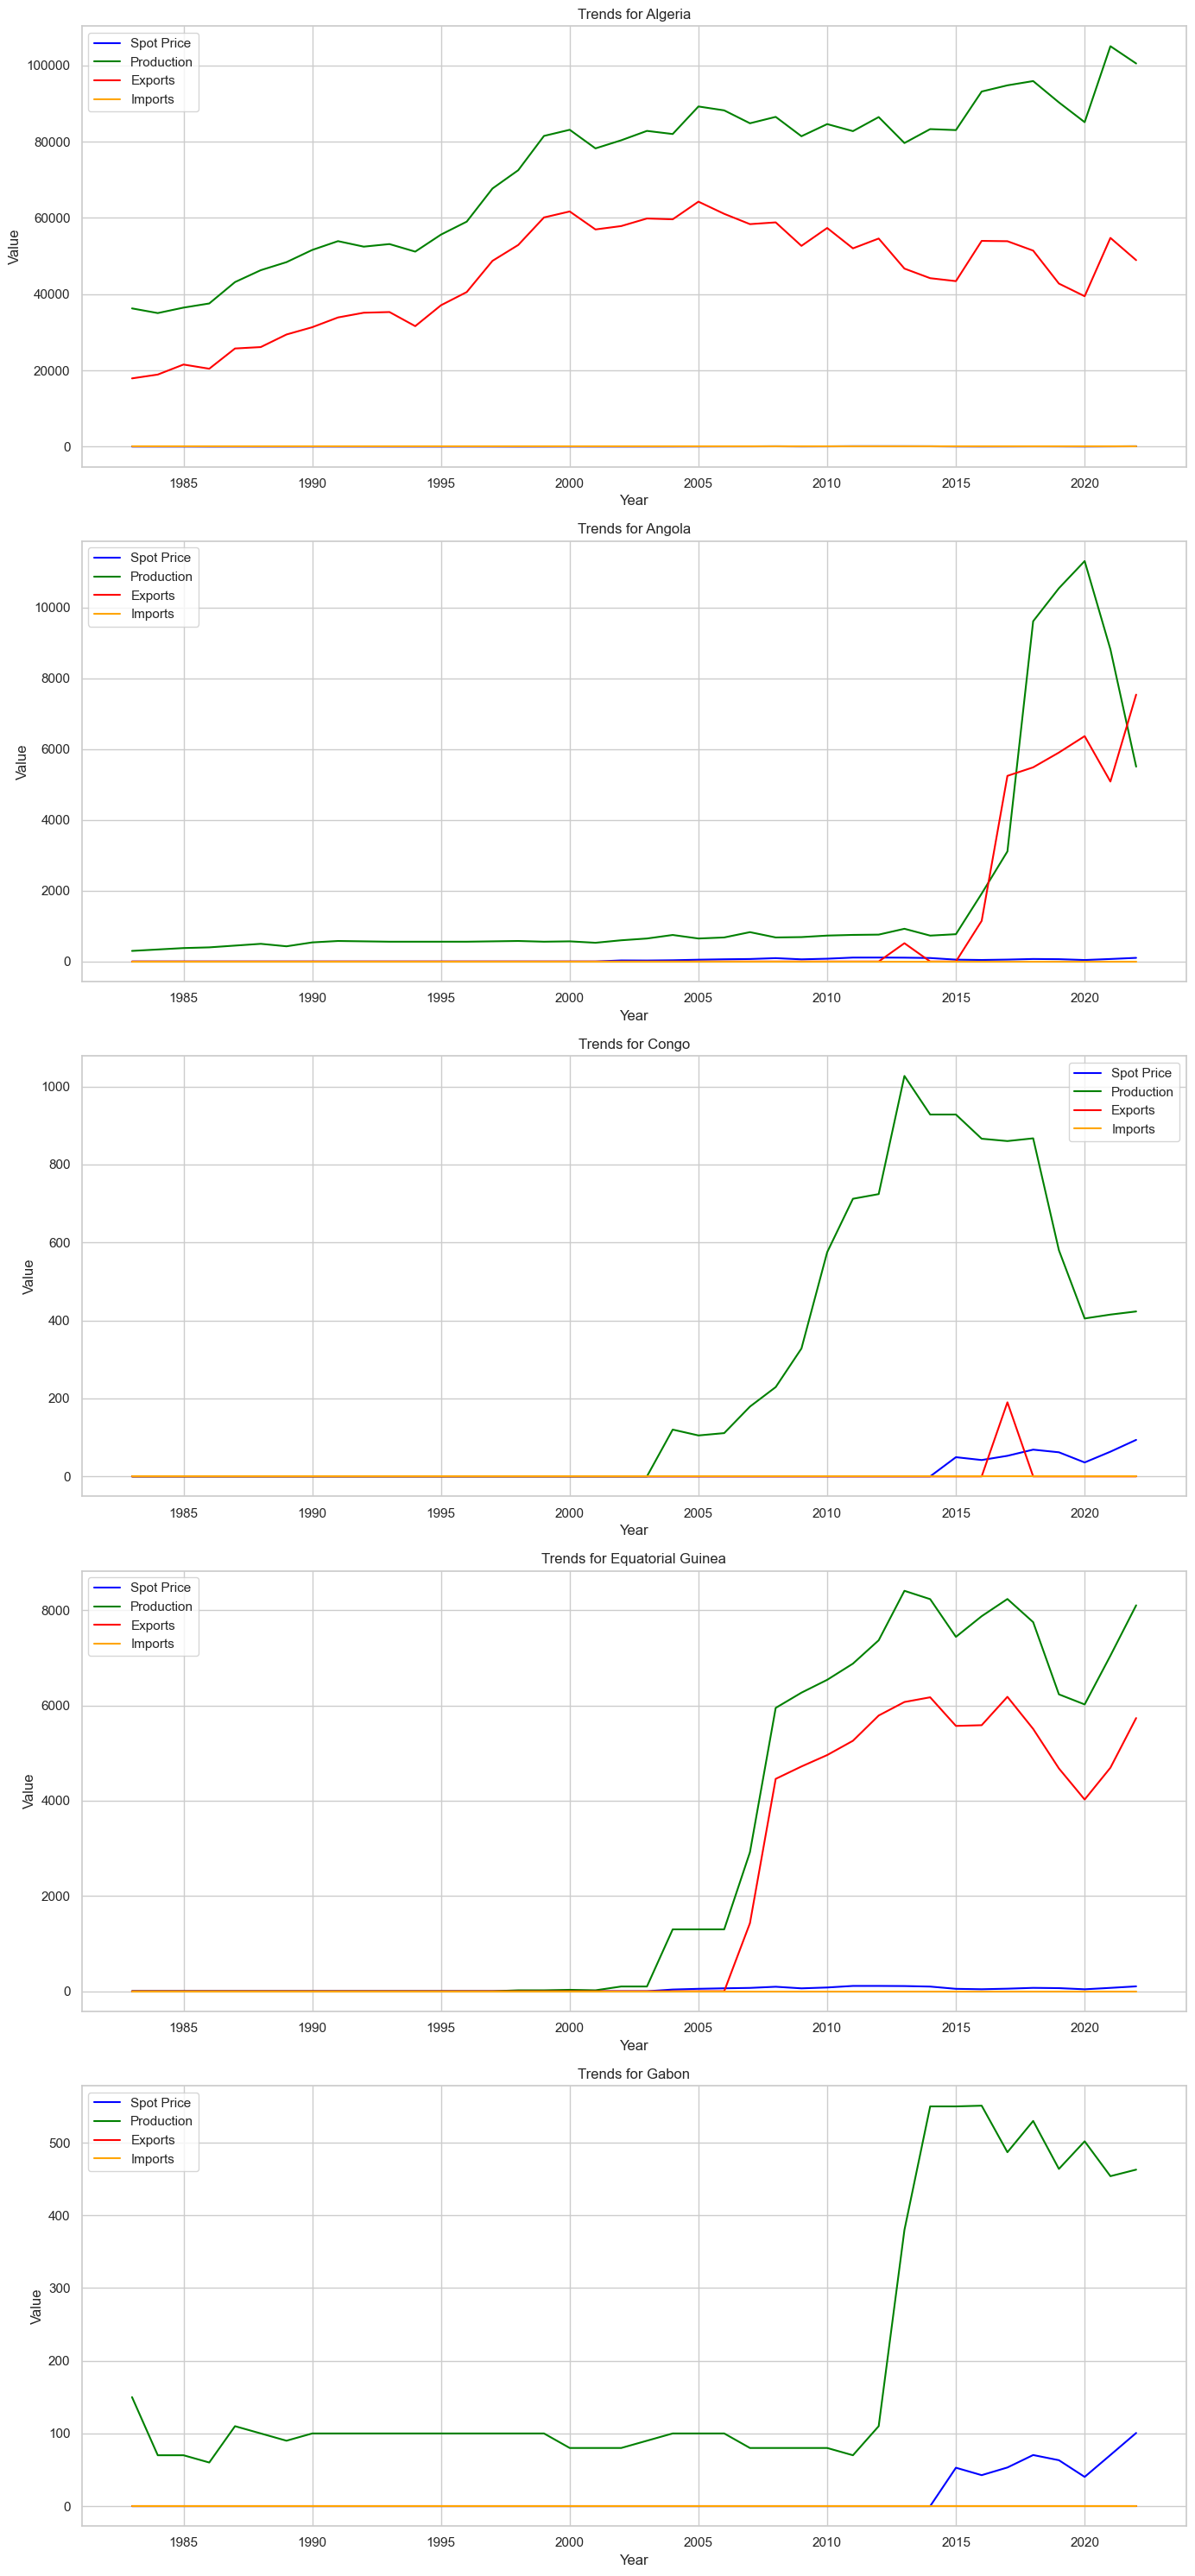

In [58]:
# Grouping the data by country and then analyzing each country separately
countries = data['Country'].unique()
num_countries = len(countries)
batch_size = 5  # Number of countries to process in each batch

# Function to plot country specific analysis for a given list of countries
def plot_country_specific_analysis(countries_batch, data):
    num_plots = len(countries_batch)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(14, 6 * num_plots))

    for i, country in enumerate(countries_batch):
        country_data = data_filled[data_filled['Country'] == country]
        
        sns.lineplot(ax=axes[i], x='Year', y='Spot_Price_72', data=country_data, label='Spot Price', color='blue')
        sns.lineplot(ax=axes[i], x='Year', y='Production', data=country_data, label='Production', color='green')
        sns.lineplot(ax=axes[i], x='Year', y='Exports', data=country_data, label='Exports', color='red')
        sns.lineplot(ax=axes[i], x='Year', y='Imports', data=country_data, label='Imports', color='orange')

        axes[i].set_title(f'Trends for {country}')
        axes[i].set_ylabel('Value')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Processing the first batch
first_batch = countries[:batch_size]
plot_country_specific_analysis(first_batch, data)


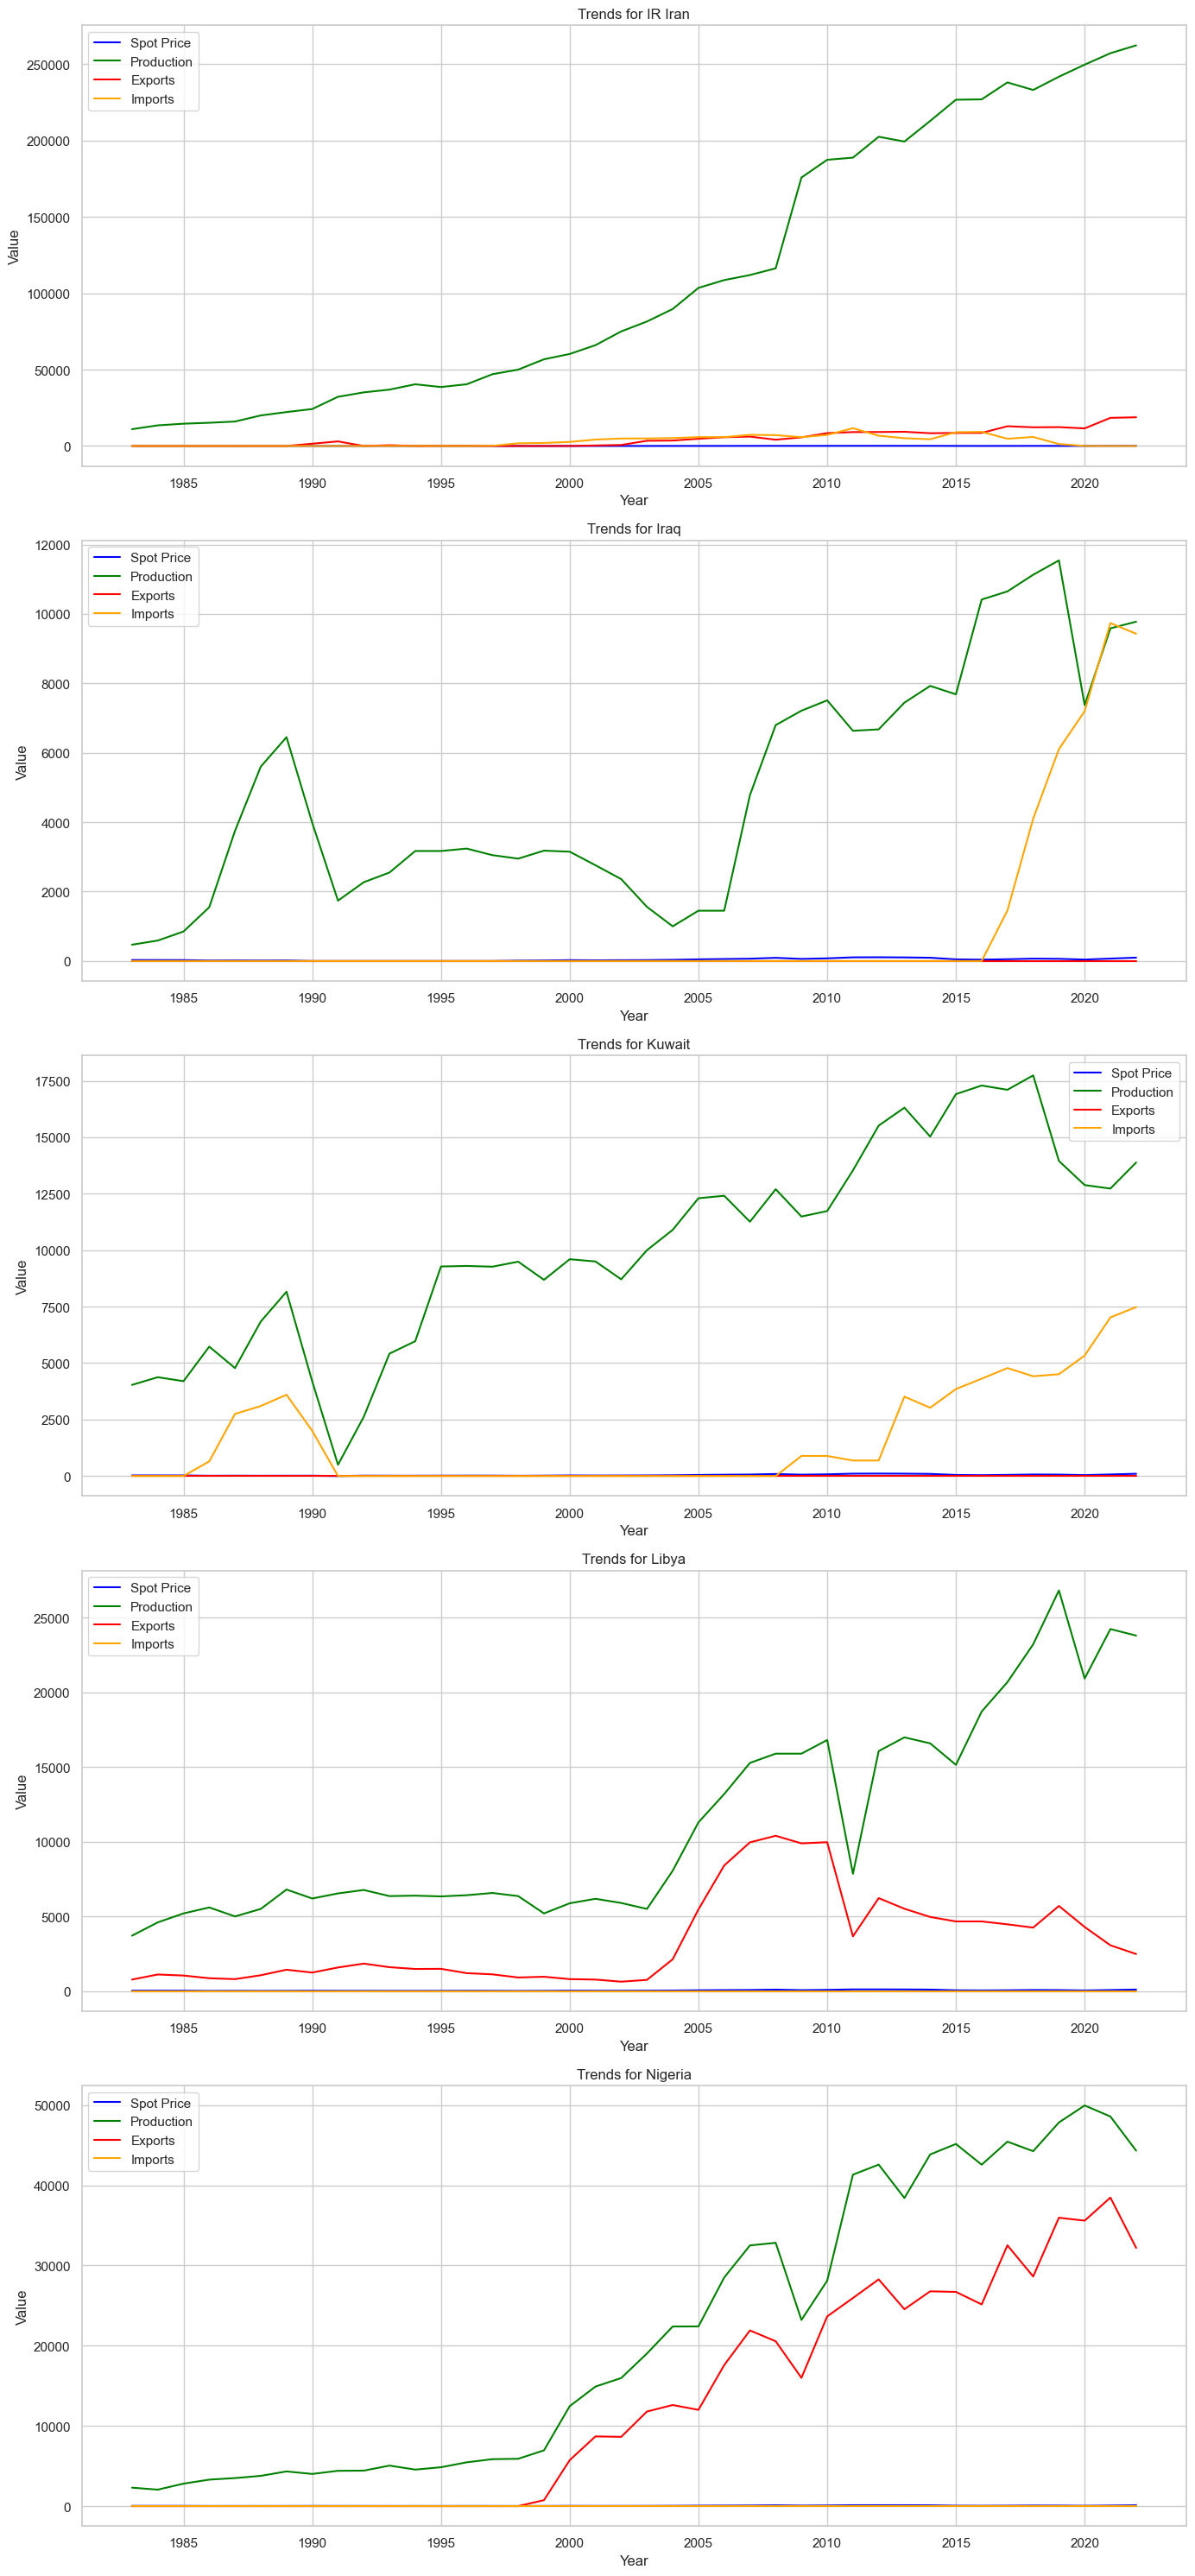

In [59]:
# Processing the next batch of countries
# Determining the next batch based on the number of countries already processed
next_batch_start = batch_size
next_batch_end = min(next_batch_start + batch_size, num_countries)
next_batch = countries[next_batch_start:next_batch_end]

# Plotting the country specific analysis for the next batch
plot_country_specific_analysis(next_batch, data)


In [60]:
country_data

,Country,Year,Spot_Price_72,Crude_oil_exports_52,Demand,Exports,Gas_Reserve,Imports,Production,Oil_demand_46,...,AccountBalance-table2.7,WellsCompleted-table3.3,Population-table2.1,petroleumExport-table2.5,GDP-table2.2,GDPGrowthRate-table2.3,ExportValue-table2.4,crudeOilReserve-table3.1,CrudeOilProdution-table3.5,bioFuelProdution-table3.7
4,Gabon,1983,0.00,135.5,150,0.0,12,0.0,150,12,...,3689,3689,3689,3689,3689,3689,3689,3689,3689,3689
18,Gabon,1984,0.00,139.5,150,0.0,16,0.0,70,11,...,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
32,Gabon,1985,0.00,163.8,57,0.0,19,0.0,70,13,...,3736,3736,3736,3736,3736,3736,3736,3736,3736,3736
46,Gabon,1986,0.00,150.1,28,0.0,17,0.0,60,14,...,4889,4889,4889,4889,4889,4889,4889,4889,4889,4889
60,Gabon,1987,0.00,145.1,116,0.0,18,0.0,110,12,...,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699
74,Gabon,1988,0.00,148.1,100,0.0,16,0.0,100,12,...,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079
88,Gabon,1989,0.00,192.5,90,0.0,14,0.0,90,13,...,4458,4458,4458,4458,4458,4458,4458,4458,4458,4458
102,Gabon,1990,0.00,255.0,85,0.0,12,0.0,100,11,...,6339,6339,6339,6339,6339,6339,6339,6339,6339,6339
116,Gabon,1991,0.00,278.5,100,0.0,11,0.0,100,12,...,5754,5754,5754,5754,5754,5754,5754,5754,5754,5754
130,Gabon,1992,0.00,271.3,100,0.0,16,0.0,100,12,...,5955,5955,5955,5955,5955,5955,5955,5955,5955,5955


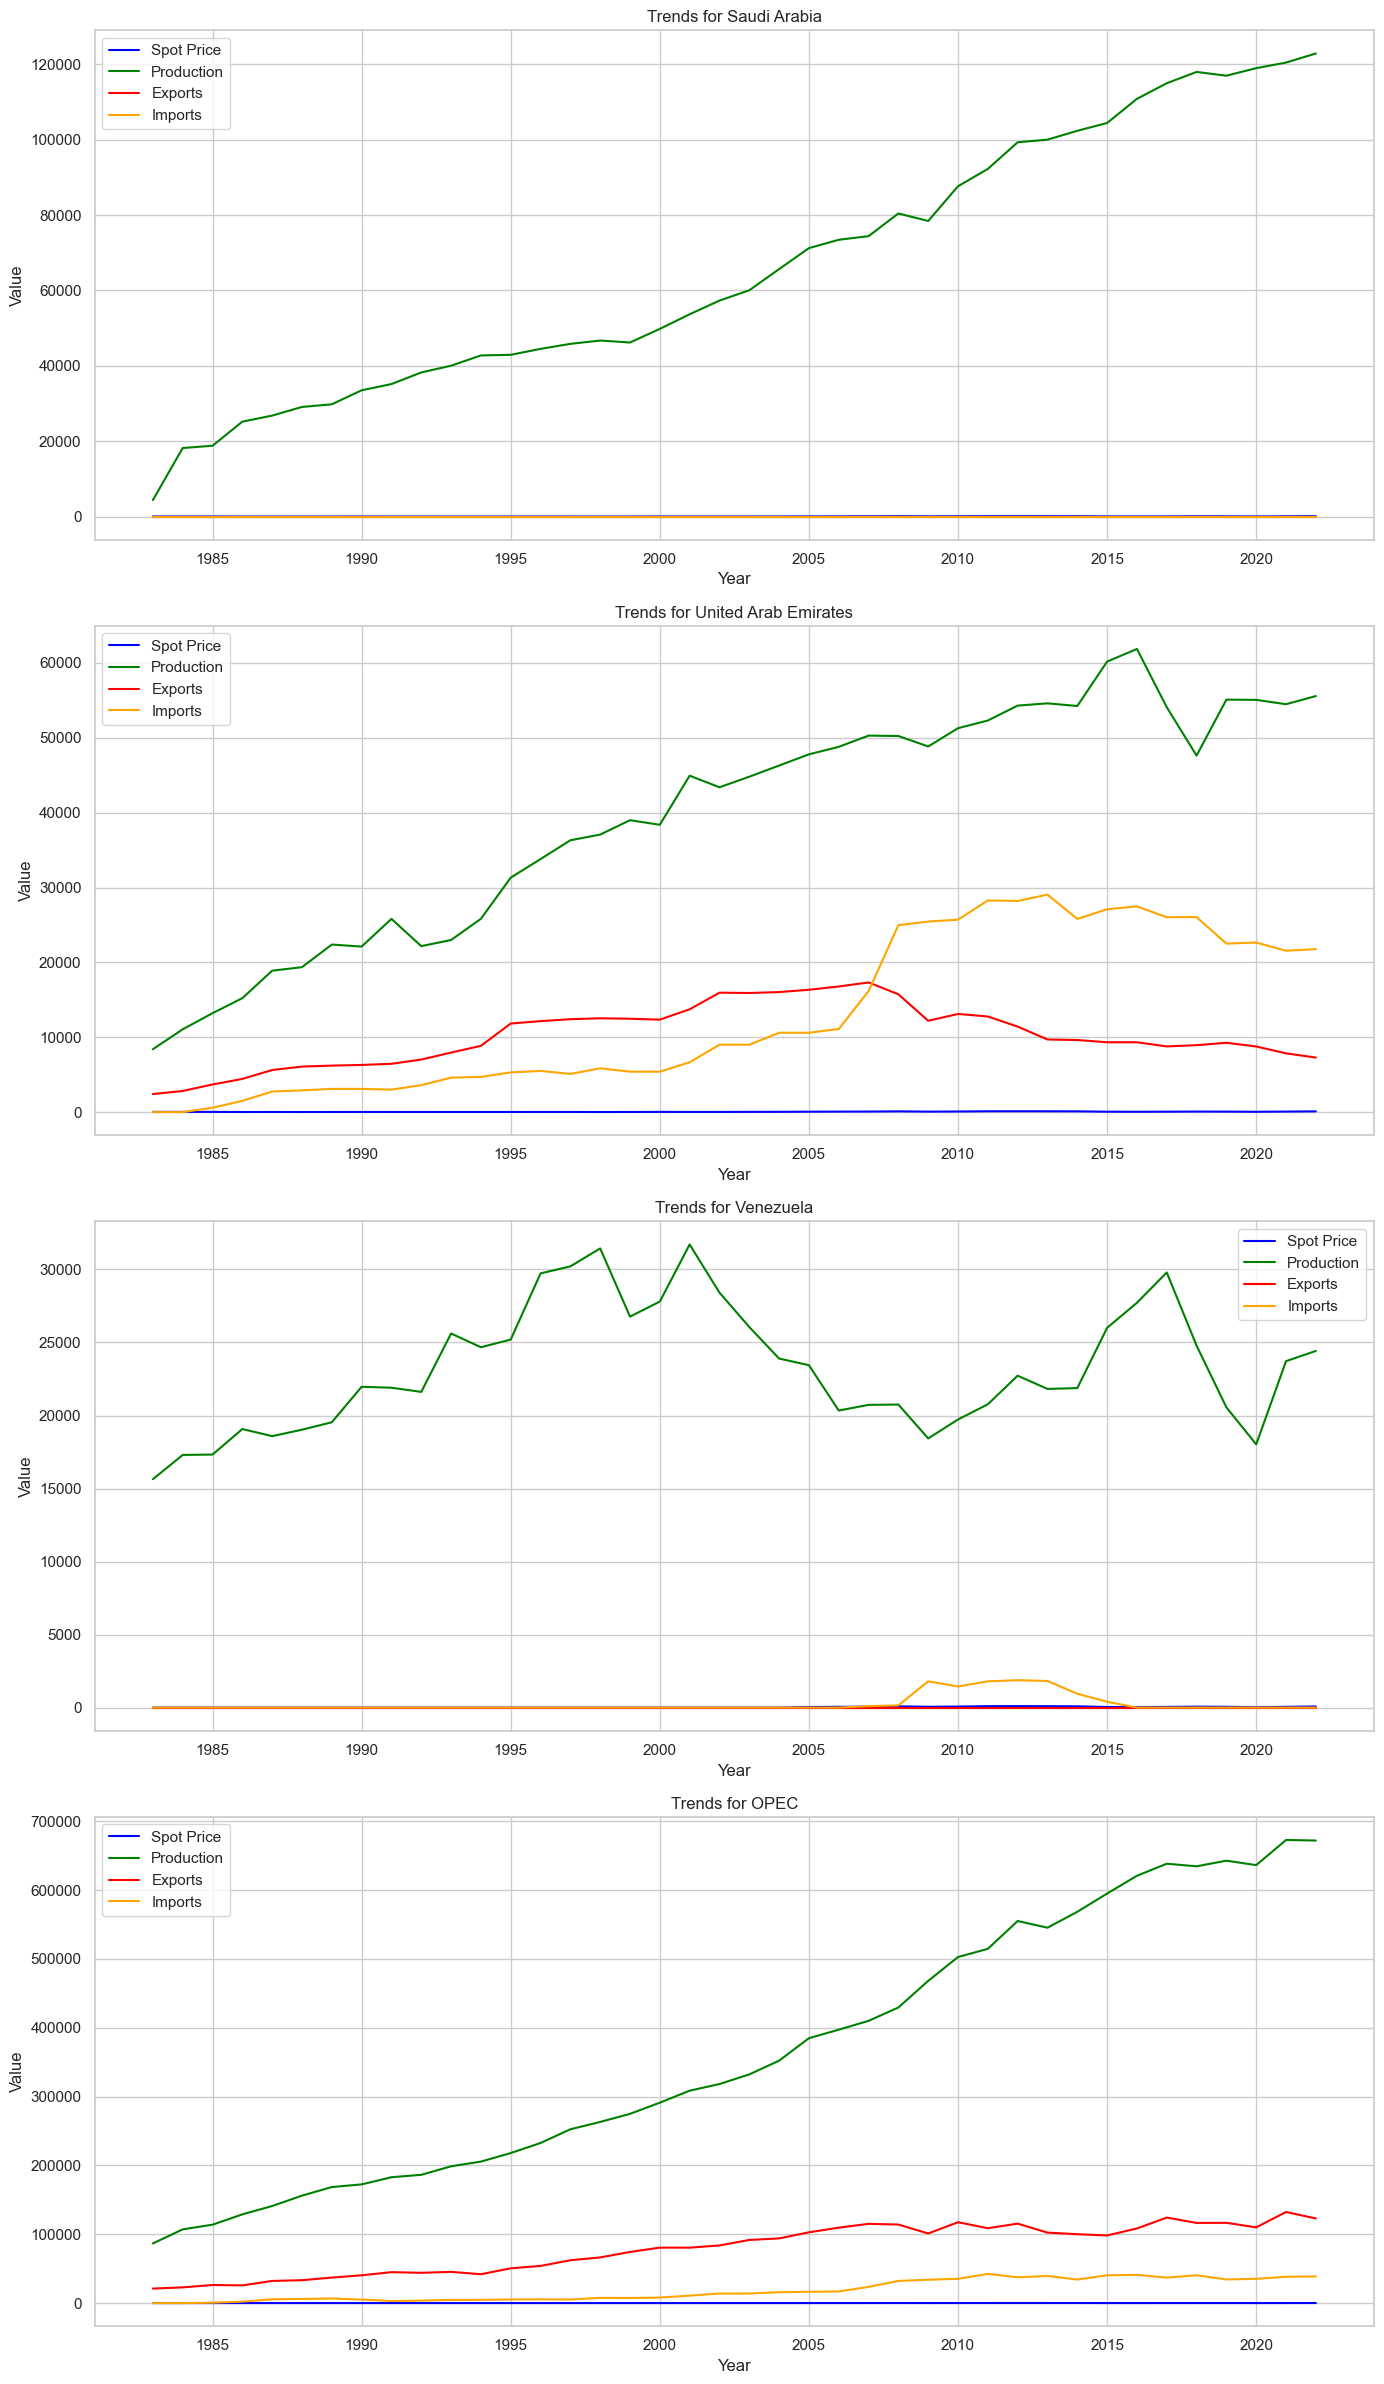

In [61]:
# Processing the next batch of countries
# Determining the next batch based on the number of countries already processed
next_batch_start = next_batch_end
next_batch_end = min(next_batch_start + batch_size, num_countries)
next_batch = countries[next_batch_start:next_batch_end]

# Plotting the country specific analysis for the next batch
plot_country_specific_analysis(next_batch, data)
